# Assignment 2

# 1. Regression

In this assignment, you will explore the California Housing Prices dataset. Your task is to apply various regression techniques, specifically Kernel Ridge Regression (KRR), Bayesian Linear Regression, and Gaussian Process Regression, to predict housing prices.


### Dataset
We will use the "California Housing Prices" dataset from the `sklearn.datasets` module for ease of access. 

### Objectives
1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Apply Kernel Ridge Regression (KRR) with different hyperparameters and analyze the results.
3. Implement Bayesian Linear Regression and discuss the posterior distributions.
4. Explore Gaussian Process Regression and visualize the prediction uncertainties.
5. Compare the performance of the three regression techniques and discuss your findings.



## Tasks

### 1. Data Exploration and Preprocessing
- Use the knowledge you gain from previouse assignment on this dataset. 
- You do not have to repeat the visualization of the data, only remeber the important fact that you gain by analysing it. 

#### 2. Kernel Ridge Regression (KRR)
- Apply KRR to the dataset.
- Experiment with different kernels and regularization parameters.
- Analyze the performance and discuss how different hyperparameters impact the model.

#### 3. Bayesian Linear Regression
- Implement Bayesian Linear Regression. You can use  Bayesian Ridge Regression function from Scikit-Learn.
- Visualize the posterior distributions of the coefficients (at least one coefficient).
- Discuss the insights gained from the posterior analysis.

#### 4. Gaussian Process Regression
- Apply Gaussian Process Regression to the dataset.
- Visualize the prediction uncertainties.
- Discuss how the Gaussian Process handles uncertainty in predictions.

#### 5. Comparative Analysis
- Compare the results obtained from KRR, Bayesian Linear Regression, and Gaussian Process Regression.
    - Visualize the regression fit provided by each model and compare.
    - Use at least one of the metrics: MSE, RMSE, R2
- Evaluate and discuss the performance, computational efficiency, and ease of interpretation of each model.
    - For Bayesian Linear Regression, analyze the posterior distributions of the coefficients. For KRR, discuss the interpretability of the kernel.



In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the California Housing Prices dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [2]:
# Kernel Ridge Regression
krr_model = KernelRidge(kernel='rbf', alpha=1.0)
krr_model.fit(X_train_scaled, y_train)
y_pred_krr = krr_model.predict(X_test_scaled)



/Users/najmeh/miniconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [39]:
BayesianRidge?

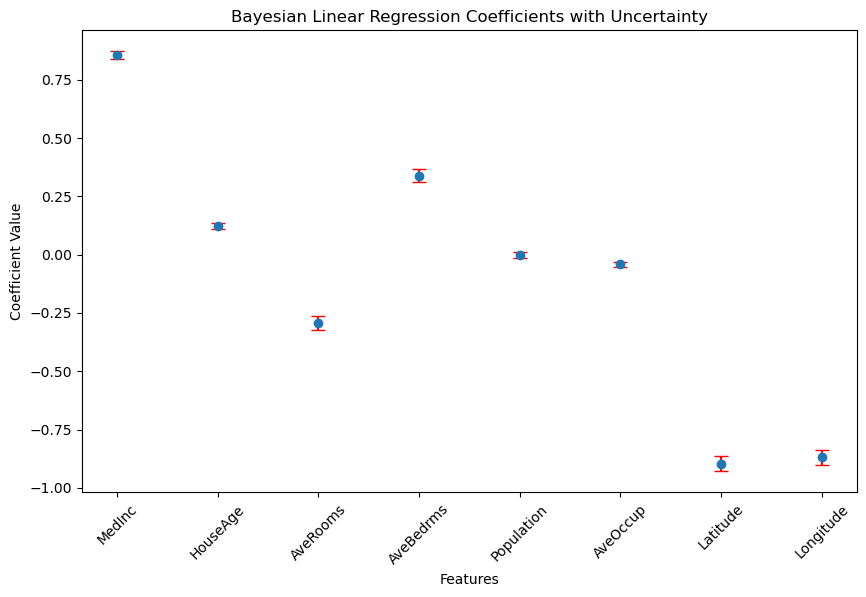

In [59]:
# Bayesian Linear Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train_scaled, y_train)
y_pred_bayesian = bayesian_model.predict(X_test_scaled)


# Extract the standard deviation of the coefficients
std_dev_coef = np.sqrt(np.diag(bayesian_model.sigma_))

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(bayesian_model.coef_)), bayesian_model.coef_,
             yerr=1.96*std_dev_coef, #  to approximate the 95% confidence interval for the coefficients.  95% of the values lie within approximately 1.96 standard deviations from the mean.(coefficient - 1.96 * std_dev)  
             fmt='o', 
             ecolor='r',
             capsize=5)
plt.xticks(range(len(bayesian_model.coef_)), data.feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Bayesian Linear Regression Coefficients with Uncertainty')
plt.show()

In [50]:
GaussianProcessRegressor?

### [List of possible kernels in sklearn](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html)

In [49]:
# Gaussian Process Regression
from sklearn.gaussian_process.kernels import Matern
Matern?

In [51]:
kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 1.0), nu=1.5)
gpr_model = GaussianProcessRegressor(kernel=kernel, random_state=42)


gpr_model.fit(X_train_scaled, y_train)
y_pred_gpr, std_dev_gpr = gpr_model.predict(X_test_scaled, return_std=True)


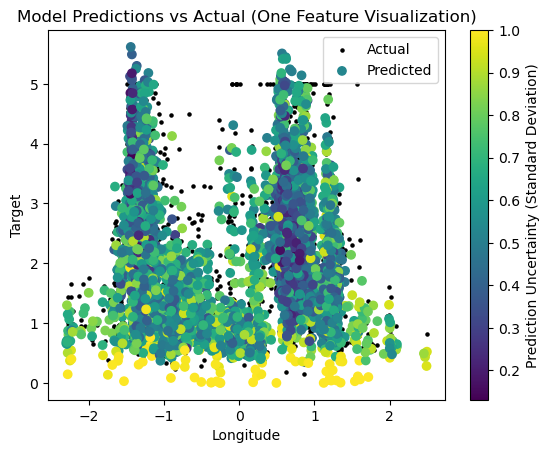

In [55]:
# Select one feature for visualization (for example, the first feature)
feature_index = 7
selected_feature = X_test_scaled[:, feature_index]

# Plot
plt.scatter(selected_feature, y_test, color='black', s = 5 ,label='Actual')

scatter = plt.scatter(selected_feature, y_pred_gpr,  c=std_dev_gpr, cmap='viridis', label='Predicted')
plt.colorbar(scatter, label='Prediction Uncertainty (Standard Deviation)')
plt.xlabel(data.feature_names[feature_index])
plt.ylabel('Target')
plt.title('Model Predictions vs Actual (One Feature Visualization)')
plt.legend()
plt.show()

In [38]:
# Evaluate the models
mse_krr = mean_squared_error(y_test, y_pred_krr)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)
mse_gpr = mean_squared_error(y_test, y_pred_gpr)

r2_krr = r2_score(y_test, y_pred_krr)
r2_bayesian = r2_score(y_test, y_pred_bayesian)
r2_gpr = r2_score(y_test, y_pred_gpr)

# Display results
results = pd.DataFrame({
    'Model': ['Kernel Ridge Regression', 'Bayesian Linear Regression', 'Gaussian Process Regression'],
    'MSE': [mse_krr, mse_bayesian, mse_gpr],
    'R2 Score': [r2_krr, r2_bayesian, r2_gpr]
})

results



,Model,MSE,R2 Score
0,Kernel Ridge Regression,0.352829,0.730749
1,Bayesian Linear Regression,0.555831,0.575834
2,Gaussian Process Regression,0.391720,0.701070
